In [3]:
# Génération de données aléatoires pour 3 clusters
np.random.seed(0)
data = np.random.randn(100, 2) # 100 points de données à 2 dimensions
data[:50] += 3 # Ajout de 3 à la première moitié des points pour créer un premier cluster
data[50:75] += 4 # Ajout de 4 à la moitié suivante des points pour créer un deuxième cluster
data[75:] += 2 # Ajout de 2 à la dernière moitié des points pour créer un troisième cluster
print(data)

[[ 4.76405235  3.40015721]
 [ 3.97873798  5.2408932 ]
 [ 4.86755799  2.02272212]
 [ 3.95008842  2.84864279]
 [ 2.89678115  3.4105985 ]
 [ 3.14404357  4.45427351]
 [ 3.76103773  3.12167502]
 [ 3.44386323  3.33367433]
 [ 4.49407907  2.79484174]
 [ 3.3130677   2.14590426]
 [ 0.44701018  3.6536186 ]
 [ 3.8644362   2.25783498]
 [ 5.26975462  1.54563433]
 [ 3.04575852  2.81281615]
 [ 4.53277921  4.46935877]
 [ 3.15494743  3.37816252]
 [ 2.11221425  1.01920353]
 [ 2.65208785  3.15634897]
 [ 4.23029068  4.20237985]
 [ 2.61267318  2.69769725]
 [ 1.95144703  1.57998206]
 [ 1.29372981  4.9507754 ]
 [ 2.49034782  2.5619257 ]
 [ 1.74720464  3.77749036]
 [ 1.38610215  2.78725972]
 [ 2.10453344  3.3869025 ]
 [ 2.48919486  1.81936782]
 [ 2.97181777  3.42833187]
 [ 3.06651722  3.3024719 ]
 [ 2.36567791  2.63725883]
 [ 2.32753955  2.64044684]
 [ 2.18685372  1.2737174 ]
 [ 3.17742614  2.59821906]
 [ 1.36980165  3.46278226]
 [ 2.09270164  3.0519454 ]
 [ 3.72909056  3.12898291]
 [ 4.13940068  1.76517418]
 

In [14]:
import math
import numpy as np
import matplotlib.pyplot as plt

#La distance euclidienne
def distance_euclidienne(point1,point2):
    return np.sqrt(np.sum((point1 - point2)**2))

#La distance de manhattan
def distance_manhattan(point1,point2):
    return np.sum(abs(point1 - point2))

#La distance de minkowski
def distance_minkowski(point1,point2,p):
    try:
        return (np.sum(abs(point1 - point2)**p))**(1/p)
    except ValueError:
        print("Impossible de divisé une valeur par zero !")
            
        

In [5]:
#L'algorithme des k-means (k-moyennes) apprentissage non supervisé
def kmeans_euclidienne(data, k, n_init=10, max_iter=300):

    n_samples, n_features = data.shape
    # Initialiser les centroïdes de manière aléatoire
    centroids = data[np.random.randint(0, n_samples, size=k), :]
    for i in range(n_init):
        # Initialiser les clusters
        clusters = np.zeros(n_samples)
        for j in range(max_iter):
            # Attribuer des points de données au centroïde le plus proche
            for idx, point in enumerate(data):
                distances = [distance_euclidienne(point, cent) for cent in centroids]
                clusters[idx] = np.argmin(distances)
            # Recalculer les centroïdes comme moyenne de tous les points de données attribués au cluster
            for cluster_idx in range(k):
                points_idx = np.where(clusters == cluster_idx)
                centroids[cluster_idx] = np.mean(data[points_idx], axis=0)
    return centroids, clusters


In [6]:
#L'algorithme des k-means (k-moyennes) apprentissage non supervisé
def kmeans_manhattan(data, k, n_init=10, max_iter=300):

    n_samples, n_features = data.shape
    # Initialiser les centroïdes de manière aléatoire
    centroids = data[np.random.randint(0, n_samples, size=k), :]
    for i in range(n_init):
        # Initialiser les clusters
        clusters = np.zeros(n_samples)
        for j in range(max_iter):
            # Attribuer des points de données au centroïde le plus proche
            for idx, point in enumerate(data):
                distances = [distance_manhattan(point, cent) for cent in centroids]
                clusters[idx] = np.argmin(distances)
            # Recalculer les centroïdes comme moyenne de tous les points de données attribués au cluster
            for cluster_idx in range(k):
                points_idx = np.where(clusters == cluster_idx)
                centroids[cluster_idx] = np.mean(data[points_idx], axis=0)
    return centroids, clusters


In [7]:
#L'algorithme des k-means (k-moyennes) apprentissage non supervisé
def kmeans_minkowski(data, k, p , n_init=10, max_iter=300):

    n_samples, n_features = data.shape
    # Initialiser les centroïdes de manière aléatoire
    centroids = data[np.random.randint(0, n_samples, size=k), :]
    for i in range(n_init):
        # Initialiser les clusters
        clusters = np.zeros(n_samples)
        for j in range(max_iter):
            # Attribuer des points de données au centroïde le plus proche
            for idx, point in enumerate(data):
                distances = [distance_minkowski(point, cent,p) for cent in centroids]
                clusters[idx] = np.argmin(distances)
            # Recalculer les centroïdes comme moyenne de tous les points de données attribués au cluster
            for cluster_idx in range(k):
                points_idx = np.where(clusters == cluster_idx)
                centroids[cluster_idx] = np.mean(data[points_idx], axis=0)
    return centroids, clusters

[0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 2. 0. 0. 0. 1. 0. 2. 0. 1. 2. 2. 1. 2. 2.
 2. 2. 2. 0. 0. 2. 2. 2. 0. 2. 2. 0. 0. 0. 2. 0. 2. 0. 1. 0. 2. 1. 1. 0.
 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 0. 2. 2. 2. 0. 2. 2. 0. 2. 2. 0. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 0. 0.]
[[3.62360865 2.75057153]
 [3.81880939 4.74435965]
 [1.73145713 2.23392871]]


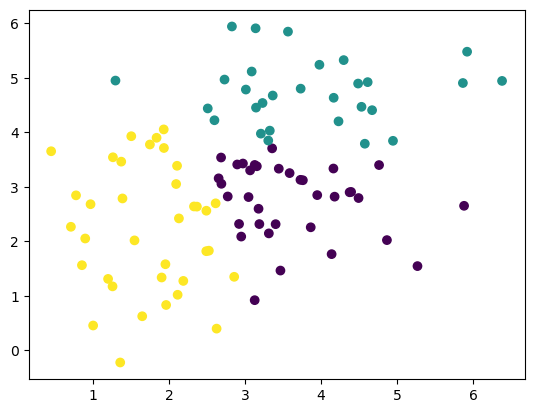

In [8]:
#Avec la distance euclidienne
centers,clusters = kmeans_euclidienne(data,3)
print(clusters) 
print(centers)
plt.scatter(data[:,0],data[:,1],c=clusters)

[0. 0. 2. 0. 1. 0. 0. 1. 0. 2. 1. 2. 2. 1. 0. 1. 2. 1. 0. 1. 2. 1. 2. 1.
 1. 1. 2. 1. 1. 1. 1. 2. 2. 1. 1. 0. 2. 2. 1. 1. 1. 2. 0. 0. 1. 1. 0. 0.
 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 1. 1. 2. 2. 2. 2. 1. 2. 1. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 2. 1. 2.
 2. 2. 1. 0.]
[[4.11500962 4.21281678]
 [2.20040173 3.41900514]
 [2.49148453 1.5804994 ]]


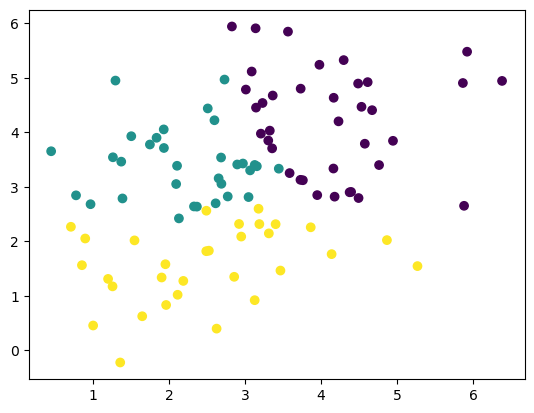

In [9]:
#Avec la distance de manhattan
centers,clusters = kmeans_manhattan(data,3)
print(clusters) 
print(centers)
plt.scatter(data[:,0],data[:,1],c=clusters)

[2. 0. 2. 2. 2. 0. 2. 2. 2. 2. 1. 2. 2. 2. 0. 2. 1. 2. 0. 1. 1. 0. 1. 1.
 1. 1. 1. 2. 2. 1. 1. 1. 2. 1. 1. 2. 2. 2. 1. 2. 1. 2. 0. 2. 1. 0. 0. 2.
 0. 2. 2. 0. 0. 2. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0.
 0. 0. 2. 1. 1. 1. 1. 1. 1. 2. 1. 1. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 2. 2.]
[[3.81880939 4.74435965]
 [1.76916467 2.19841897]
 [3.63822549 2.80440985]]


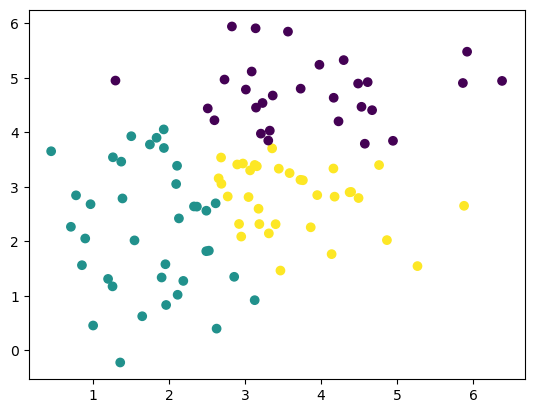

In [10]:
#Avec la distance de minkowski
centers,clusters = kmeans_minkowski(data,3,2)
print(clusters) 
print(centers)
plt.scatter(data[:,0],data[:,1],c=clusters)

[1 1 1 1 2 2 1 2 1 0 2 0 1 0 1 2 0 2 1 0 0 2 0 2 0 2 0 2 2 0 0 0 0 2 2 1 0
 0 0 2 2 0 1 1 2 2 2 2 2 2 1 2 2 1 1 1 2 1 1 1 1 1 2 2 1 2 2 2 1 1 2 1 1 2
 2 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 1]


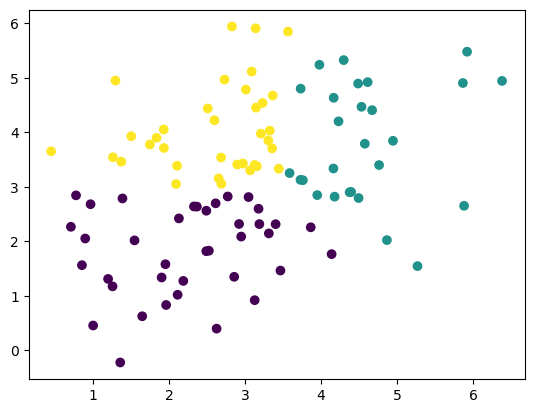

In [12]:
from sklearn.cluster import KMeans

#Définir le nombre de clusters
k = 3

#Instancier l'algorithme
kmeans = KMeans(n_clusters=k)

#Entrainer l'algorithme sur les données
kmeans.fit(data)

#Prédire les clusters pour chaque point de données
clusters_p = kmeans.predict(data)

print(clusters_p)
plt.scatter(data[:,0],data[:,1],c=clusters_p)

[2 1 2 2 2 1 2 2 2 2 0 2 2 2 1 2 0 2 1 2 0 0 2 0 0 2 2 2 2 2 2 0 2 0 2 2 2
 2 2 2 0 2 1 2 0 1 1 1 1 2 2 1 1 2 1 1 1 1 2 1 2 1 1 1 1 1 1 1 2 2 1 1 1 1
 2 0 0 0 2 0 0 2 0 0 2 2 2 0 0 0 0 0 2 0 0 0 0 2 2 2]


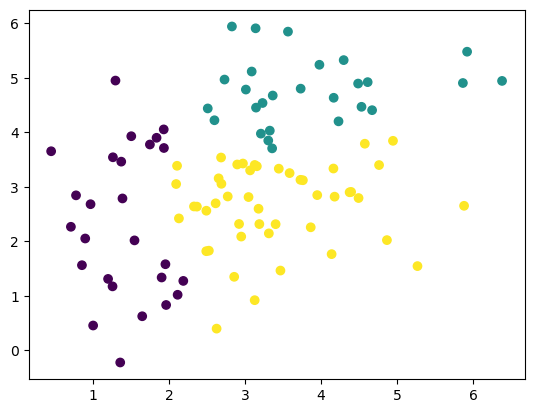

In [13]:

from sklearn.cluster import AgglomerativeClustering

# Définir le nombre de clusters
k = 3

# Instancier l'algorithme
agglomerative = AgglomerativeClustering(n_clusters=k)

# Prédire les clusters pour chaque point de données
clusters_h = agglomerative.fit_predict(data)

print(clusters_h)
plt.scatter(data[:,0],data[:,1],c=clusters_h)